In [1]:
import numpy as np 
import pandas as pd 


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import tensorflow as tf

In [4]:
data = pd.read_csv('fraudTest.csv')

In [5]:
data.shape

(555719, 23)

In [6]:
pd.options.display.max_columns = None


In [7]:
data.tail()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [8]:


# Sample rows with is_fraud = 1 and is_fraud = 0
fraud_sample = data[data['is_fraud'] == 1].sample(5, random_state=1)  # Adjust number as needed
non_fraud_sample = data[data['is_fraud'] == 0].sample(5, random_state=1)  # Adjust number as needed

# Concatenate both samples
sampled_data = pd.concat([fraud_sample, non_fraud_sample])

# Display the result in the desired format
sampled_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
65920,65920,2020-07-13 22:52:38,676314217768,"fraud_Hyatt, Russel and Gleichner",health_fitness,18.35,Ellen,Carrillo,F,9431 Amanda Mills,Odessa,MO,64076,38.9829,-93.9757,9512,Clinical research associate,1972-12-31,a6bd4f7585782a1bca562bc5d8863494,1373755958,38.212745,-93.038614,1
272942,272942,2020-09-30 05:02:57,4514242065619750,fraud_Donnelly LLC,entertainment,509.77,Janet,Carpenter,F,9870 Collins Flat,Laramie,WY,82072,41.4247,-105.4781,35371,"Pilot, airline",1988-09-02,4ac8ff14913b298bc673b81f9c07c8f5,1380517377,40.484410,-105.536704,1
387908,387908,2020-11-20 03:54:45,6538441737335434,fraud_Mraz-Herzog,gas_transport,11.34,Gina,Grimes,F,444 Robert Mews,Clarks Mills,PA,16114,41.3851,-80.1752,606,Energy manager,1997-09-22,baf37926b727a7f6f813b5843cc97339,1384919685,40.717936,-80.983903,1
325721,325721,2020-10-23 23:39:49,4481131401752,"fraud_Schmeler, Bashirian and Price",shopping_net,1140.55,Frank,Foster,M,37910 Ward Lights,Shrewsbury,MA,1545,42.2848,-71.7205,35299,English as a second language teacher,1975-04-30,54cd6f816cd823d84c4961dee4ee46bd,1382571589,41.979828,-72.197301,1
144024,144024,2020-08-10 16:15:35,30238755902988,fraud_Collier LLC,home,229.83,Danielle,Yu,F,5395 Colon Burgs Suite 037,Thrall,TX,76578,30.5920,-97.2893,1766,Press sub,1976-01-02,0032501057a8306fb8189d8c8cd6276b,1376151335,29.996709,-98.195081,1
260268,260268,2020-09-25 05:13:35,3587044315915002,fraud_Kozey-Boehm,shopping_net,78.62,Christian,Roman,M,495 Fisher Throughway,Grand Junction,TN,38039,35.0659,-89.1534,1804,Clothing/textile technologist,1974-10-15,4f2368b548954aaf7950a85f67a86b5a,1380086015,35.220412,-88.630188,0
223419,223419,2020-09-08 16:12:07,180072527505094,fraud_Yost-Rogahn,personal_care,12.84,Cody,Miller,M,25748 John Wells,Mooresville,NC,28117,35.5840,-80.8685,69793,Control and instrumentation engineer,1953-12-08,de8980524e536691d7a7097abf068bda,1378656727,35.588528,-80.452541,0
84095,84095,2020-07-20 14:43:00,30561214688470,"fraud_Stehr, Jewess and Schimmel",misc_net,42.11,Gina,Morrison,F,41851 Victor Drives Suite 219,Allentown,PA,18103,40.5891,-75.4645,166081,"Scientist, research (maths)",1998-10-01,a99de625e218d3818232dca409e4d2a8,1374331380,39.796758,-75.604722,0
180939,180939,2020-08-23 23:47:06,4570636521433188,"fraud_Metz, Russel and Metz",kids_pets,9.96,Christine,Leblanc,F,5097 Jodi Vista Suite 811,Deltona,FL,32725,28.8989,-81.2473,88735,Commercial horticulturist,1988-04-09,f713b14775c2ce2e0a69fd3a1c1a8073,1377301626,29.398425,-80.625534,0
98817,98817,2020-07-26 02:54:49,4740713119940984,fraud_Kutch and Sons,grocery_pos,93.67,Heather,Hines,F,13776 Hicks Plains,Pomona,NY,10970,41.1901,-74.0436,9993,Pensions consultant,1962-10-16,5dcc6cee21f24e7712c104a65938aa53,1374807289,41.710283,-73.918515,0


In [9]:
data.shape

(555719, 23)

In [10]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 555719
Number of Columns 23


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [12]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:

sc = StandardScaler()
data['amt']=sc.fit_transform(pd.DataFrame(data['amt']))


In [14]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,-0.424463,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,-0.252337,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,-0.179353,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,-0.059605,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,-0.422358,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [15]:
data.duplicated().any() #duplicate rows


False

In [16]:
data.shape


(555719, 23)

In [17]:
data['is_fraud'].value_counts()


is_fraud
0    553574
1      2145
Name: count, dtype: int64

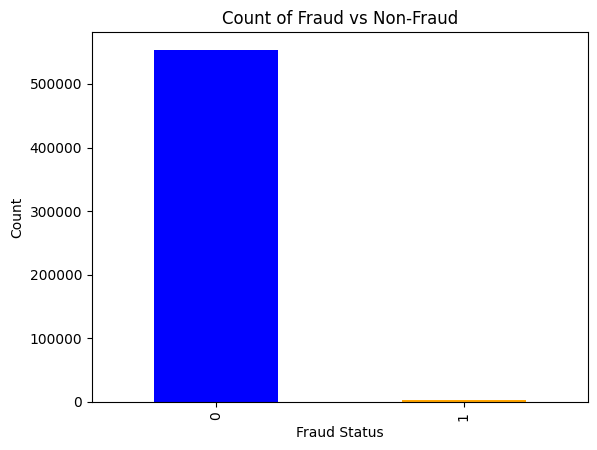

In [18]:
data['is_fraud'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Count of Fraud vs Non-Fraud')
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='is_fraud'>

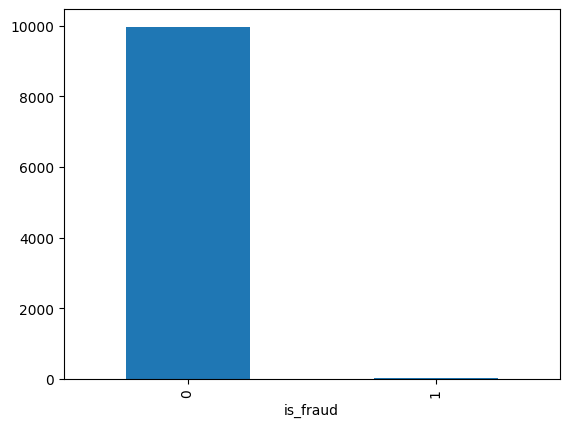

In [19]:
data.sample(10000)['is_fraud'].value_counts().plot(kind='bar')


## Data Balancing 

In [20]:
normal = data[data['is_fraud']==0]
fraud = data[data['is_fraud']==1]

In [21]:
normal.shape,fraud.shape


((553574, 23), (2145, 23))

In [22]:
normal_sample=normal.sample(n=473)


In [23]:
normal_sample.shape


(473, 23)

In [24]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)
new_data['is_fraud'].value_counts()

is_fraud
1    2145
0     473
Name: count, dtype: int64

In [25]:
new_data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,470020,2020-12-13 11:03:36,341546199006537,"fraud_Cormier, Stracke and Thiel",entertainment,-0.062859,Mark,Brown,M,8580 Moore Cove,Wales,AK,99783,64.7556,-165.6723,145,"Administrator, education",1939-11-09,4d23efd74069206b4449572a090e0e6b,1386932616,64.749440,-165.713075,0
1,351925,2020-11-03 20:10:43,4646845581490336108,"fraud_Nienow, Barrows and Romaguera",personal_care,-0.281238,Julia,Bell,F,576 House Crossroad,West Sayville,NY,11796,40.7320,-73.1000,4056,Film/video editor,1990-06-25,820eec104d9e0942db976e45d1030d5f,1383509443,40.908105,-73.740067,0
2,458223,2020-12-10 09:05:06,4855488158131690372,fraud_Pfeffer and Sons,shopping_pos,0.502324,Jeremy,Roberson,M,25887 Martin Inlet,Graniteville,VT,5654,44.1554,-72.4847,970,Agricultural consultant,1993-09-29,789463fd54e22751654b9e12a8456ffe,1386666306,44.156714,-73.357557,0
3,366429,2020-11-10 08:38:38,6596735789587928,fraud_Spencer-Runolfsson,misc_pos,-0.117342,Spencer,Williams,M,1145 Tony Drive Suite 080,Watertown,MN,55388,44.9595,-93.8482,5619,Licensed conveyancer,1959-01-15,535f75c474127c3687fefa3fbcbd870e,1384072718,45.490795,-92.895860,0
4,344247,2020-11-01 08:22:59,2720894374956739,"fraud_Monahan, Bogisich and Ledner",misc_pos,-0.322961,Audrey,Hickman,F,3325 Gregory Square,Mount Clemens,MI,48043,42.5978,-82.8823,16305,"Psychologist, sport and exercise",1927-05-25,f02e7e52caccac33426218ce19894c09,1383294179,43.275956,-83.504418,0


In [26]:
new_data = new_data.drop(columns=new_data.select_dtypes(include='object').columns)


## Spliting train and test data

In [27]:
X = new_data.drop('is_fraud',axis=1)
y = new_data['is_fraud']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

## SVM

In [29]:
# Encoding
for col in data.columns:
    if data[col].dtype == 'object':  # Check if the column is of type 'object' (usually string)
        data[col] = data[col].astype('category').cat.codes  # Convert strings to unique integer codes

# Display the first few rows to check the changes
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2291163933867244,319,10,-0.424463,151,115,1,341,157,39,29209,33.9659,-80.9355,333497,275,376,98699,1371816865,33.986391,-81.200714,0
1,1,1,3573030041201292,591,10,-0.252337,163,457,0,354,16,43,84002,40.3207,-110.4360,302,392,760,108785,1371816873,39.450498,-109.960431,0
2,2,2,3598215285024754,611,5,-0.179353,24,249,0,865,61,33,11710,40.6729,-73.5365,34496,259,421,433979,1371816893,40.495810,-74.196111,0
3,3,3,3591919803438423,222,9,-0.059605,42,457,1,320,764,8,32780,28.5697,-80.8191,54767,407,718,71993,1371816915,28.812398,-80.883061,0
4,4,4,3526826139003047,292,13,-0.422358,247,261,1,548,247,21,49632,44.2529,-85.0170,1126,196,177,190585,1371816917,44.959148,-85.884734,0


In [30]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and 'is_fraud' is the target column

# Step 1: Standardize the dataset (excluding the target column)
# Separate features and target column
X = data.drop('is_fraud', axis=1)  # Features
y = data['is_fraud']              # Target column

# Standardize the features (numerical columns only)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convert the standardized data back to a DataFrame
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

# Step 2: Find the correlation of features with the target column 'is_fraud'
# Add the target column to the standardized data
X_standardized_df['is_fraud'] = y

# Calculate the correlation matrix
correlation_matrix = X_standardized_df.corr()

# Find the correlation with 'is_fraud'
correlation_with_fraud = correlation_matrix['is_fraud'].sort_values(ascending=False)

# Display the correlation with 'is_fraud'
print(correlation_with_fraud)


is_fraud                 1.000000
amt                      0.182267
category                 0.016980
lat                      0.005863
merch_lat                0.005812
city                     0.001777
gender                   0.000748
merchant                -0.000086
long                    -0.000972
merch_long              -0.001060
last                    -0.001203
cc_num                  -0.001540
first                   -0.001725
street                  -0.001943
zip                     -0.002271
trans_num               -0.002816
city_pop                -0.004910
job                     -0.005074
state                   -0.006075
dob                     -0.008264
unix_time               -0.013066
trans_date_trans_time   -0.013864
Unnamed: 0              -0.013892
Name: is_fraud, dtype: float64


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [32]:
X = data[['amt', 'category']]
y = data['is_fraud']


In [33]:
X

,amt,category
0,-0.424463,10
1,-0.252337,10
2,-0.179353,5
3,-0.059605,9
4,-0.422358,13
...,...,...
555714,-0.163467,5
555715,0.270803,7
555716,0.111564,7
555717,-0.391735,13


In [34]:
y

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Initialize and train the SVM model
model = SVC(kernel='linear')
model.fit(X_scaled, y)


In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Create a scatter plot based on `is_fraud` values
plt.scatter(data[data['is_fraud'] == 0]['amt'], data[data['is_fraud'] == 0]['category'], 
            color='blue', label='Not Fraud (0)', alpha=0.6)
plt.scatter(data[data['is_fraud'] == 1]['amt'], data[data['is_fraud'] == 1]['category'], 
            color='red', label='Fraud (1)', alpha=0.6)

# Label and show the plot
plt.xlabel('Amount (amt)')
plt.ylabel('Category')
plt.title('SVM Classification of Fraud Transactions')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
svm = SVC()

In [ ]:
# Fit the model to the training data
svm.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm.predict(X_test)

In [ ]:
 accuracy_score(y_test, y_pred_svm)

In [ ]:
precision_score(y_test, y_pred_svm)

In [ ]:
recall_score(y_test, y_pred_svm)

In [ ]:
f1_score(y_test, y_pred_svm)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

In [ ]:
y_pred1 = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred1)

In [ ]:
recall_score(y_test,y_pred1)


In [ ]:
f1_score(y_test,y_pred1)

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

In [ ]:

y_pred2 = dt.predict(X_test)
accuracy_score(y_test,y_pred2)

In [ ]:

precision_score(y_test,y_pred2)


In [ ]:

recall_score(y_test,y_pred2)

In [ ]:

f1_score(y_test,y_pred2)

## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


In [ ]:
y_pred3 = rf.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred3)


In [ ]:
precision_score(y_test,y_pred3)


In [ ]:
recall_score(y_test,y_pred3)


In [ ]:
f1_score(y_test,y_pred3)

In [ ]:
# Assuming you already have predictions from Logistic Regression (y_pred1), Decision Tree (y_pred2), Random Forest (y_pred3), and SVM (y_pred_svm)

final_data = pd.DataFrame({
    'Models': ['LR', 'DT', 'RF', 'SVM'],
    'ACC': [accuracy_score(y_test, y_pred1) * 100,
            accuracy_score(y_test, y_pred2) * 100,
            accuracy_score(y_test, y_pred3) * 100,
            accuracy_score(y_test, y_pred_svm) * 100],
    'Precision': [precision_score(y_test, y_pred1) * 100,
                  precision_score(y_test, y_pred2) * 100,
                  precision_score(y_test, y_pred3) * 100,
                  precision_score(y_test, y_pred_svm) * 100],
    'Recall': [recall_score(y_test, y_pred1) * 100,
               recall_score(y_test, y_pred2) * 100,
               recall_score(y_test, y_pred3) * 100,
               recall_score(y_test, y_pred_svm) * 100],
    'F1_Score': [f1_score(y_test, y_pred1) * 100,
                 f1_score(y_test, y_pred2) * 100,
                 f1_score(y_test, y_pred3) * 100,
                 f1_score(y_test, y_pred_svm) * 100]
})

# Display the final comparison of all models
final_data


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the final_data DataFrame by Accuracy in ascending order
final_data_sorted = final_data.sort_values(by='ACC', ascending=True)

# Set the figure size for better visibility
plt.figure(figsize=(8, 6))

# Create the barplot
sns.barplot(x='Models', y='ACC', data=final_data_sorted)

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Performance Comparison (Sorted by Accuracy)')

# Show the plot
plt.show()
